# week 8

## goals:
- 

## todo
- 


## notes:

looked at:
- Pacific Islands (PIPA)
- Palau National Marine Sanctuary
- Natural Park of the Coral Seas


- Ross Sea
- PIPA
- PMNM
- south/central pacific ocean
- pick out the 5 from Tim White's paper:
    - PIPA - 2010, expanded 2014 <-- some actual results here
    - Pacific Remote Islands - 2009, expanded 2014 (not enough effort)
    - PMNM - yes but low fishing effort (3258 hours, 2016)
    - Pitcairn Islands - yes but low (101 hours, 2016)
    - Nazca-Desventuradas - yes but low (68 hours, 2016)
    
Actual good ones:
- Natural Park of the Coral Seas, 2014 555577562, further off the east coast of Australia
- Marae Moana/Cook Islands, 2017 555624907 - maybe the best one - middle of the Pacific
- French Austral Lands and Seas, 2019 555697868 - south-east of Africa
- Arquipélago Submarino Do Meteor, 2016 555514087 - Atlantic ocean Y shaped area
- Coral Sea, 2018 555556875 just off the east coast of Australia
- Pacífico Mexicano Profundo, 2018 555624307 southwest Mexican coast
- Palau National Marine Sanctuary, 2015, 555622118 oceania (near indonesia, phillippines) 


A bunch of these at the top are coastal around Spain/France:
- Espacio marino del Delta de l'Ebre-Illes Columbretes 2014
- Espacio marino de la Costa da Morte 2014
- Pertuis charentais - Rochebonne 2019




In [1]:
cd /Users/brendan/Masters/gfw_research

/Users/brendan/Masters/gfw_research


In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import geopandas

import util 

pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

In [3]:
# Load the data
mpas = util.load_mpas()
full_points = util.load_points()

loading mpas: 3/3 done.
loading points
 2013-12-20.csv 1826/1827
loaded.


In [4]:
aggregated = util.join_on_lat_lon(full_points)
geopoints = util.convert_to_geo(aggregated)

Text(0.5, 1.0, 'gfw fishing effort')

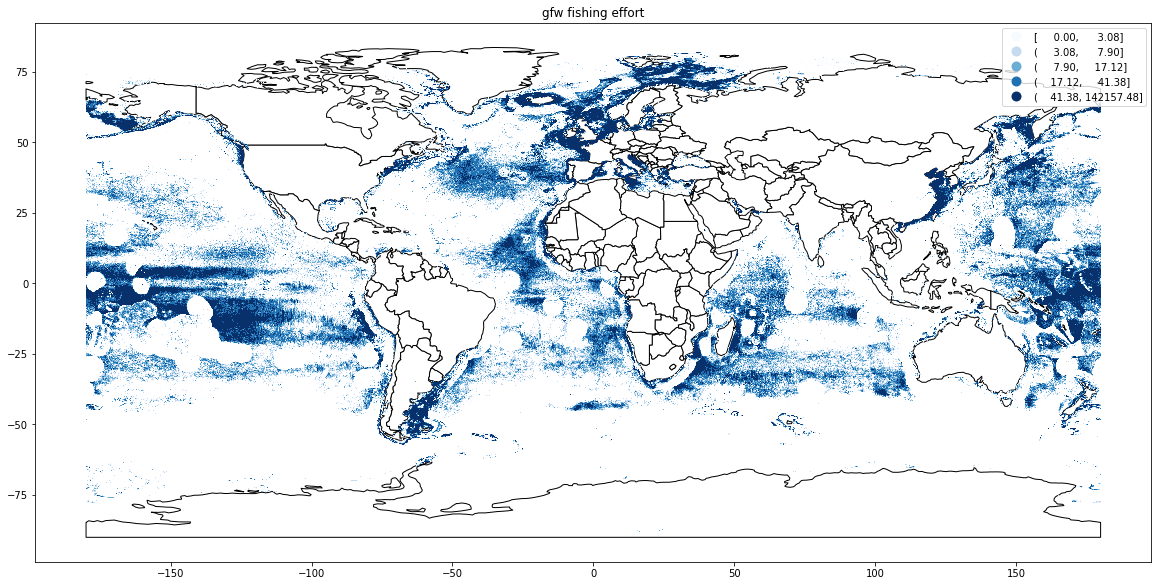

In [6]:
## Plot of just the effort
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black', figsize=(20, 30))
geopoints.plot(column='fishing_hours', cmap='Blues', scheme='quantiles', ax=ax, legend=True)
plt.title('gfw fishing effort')


In [7]:
joined_points = geopandas.sjoin(geopoints, mpas, op='within')

In [8]:
def string_join(strings):
    base = strings.iloc[0] if strings.any() else ''
    for s in strings[1:]:
        base = base if s in base else base + '|' + s
    return base


joined_points_aggregate = joined_points.groupby(['WDPAID'], as_index=False).aggregate({
    'NAME': string_join,
    'fishing_hours': 'sum',
    'STATUS_YR': 'first',
    'REP_M_AREA': 'sum',
    'REP_AREA': 'sum',
    'NO_TAKE': string_join,
})

sorted_mpas = joined_points_aggregate.sort_values("fishing_hours", ascending=False)

In [15]:
m_ = mpas.merge(sorted_mpas, on='WDPAID').sort_values("fishing_hours", ascending=False)

Text(0.5, 1.0, 'mpas by contained effort')

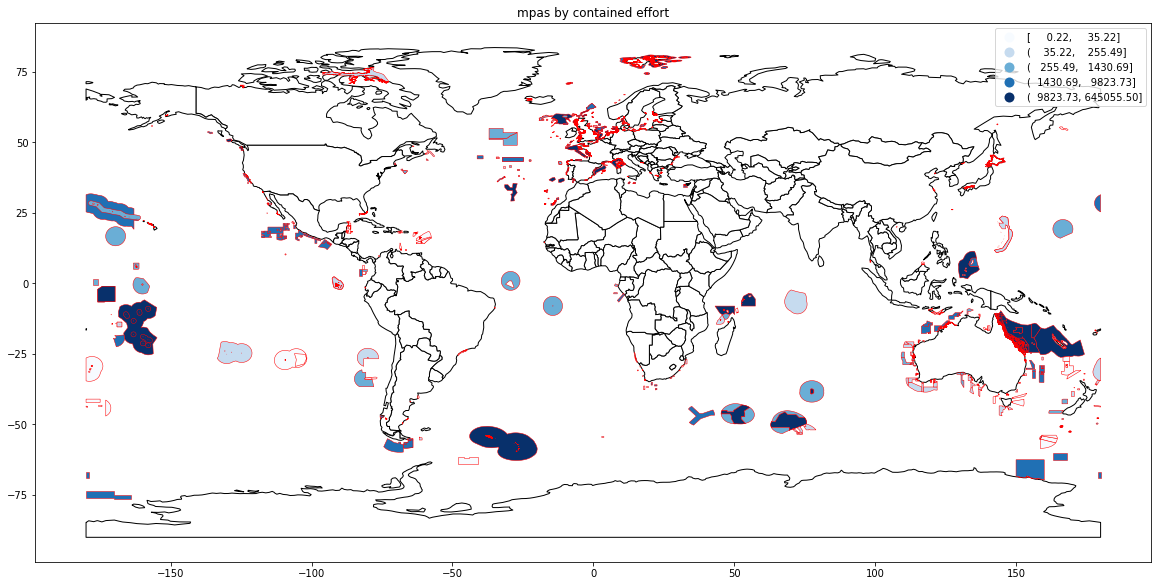

In [16]:
## Plot of mpas by contained effort
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black', figsize=(20, 30))
m_.plot(ax=ax, column='fishing_hours', edgecolor='red', linewidth=0.5, scheme='quantiles', cmap='Blues', legend=True)
plt.title('mpas by contained effort')